In [145]:
#Uzmabanu Kapadia
# Imports

import numpy as np
from numpy import spacing
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_recall_curve, auc, precision_score, recall_score
from sklearn.model_selection import train_test_split
# from IPython.display import Image
# from sklearn.tree import export_graphviz
# import pydotplus
from sklearn import tree

In [146]:
# Import the Iris data set

iris = datasets.load_iris(as_frame=True)

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
irisFeatures = np.array(df.columns[:-1])
irisData = df[irisFeatures]
label = np.array(df.columns[-1])
irisTargets = df[label]
df.head()

print(irisData)
print(irisTargets)
print(irisFeatures)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0.0
1      0.0
2      0.0
3      

In [147]:


featureCombinations = [[0],[1],[2],[3],[0, 1],[0, 2],[0, 3],[1, 2],[1, 3],[2, 3],
                       [0, 1, 2],[0, 1, 3],[0, 2, 3],[1, 2, 3],[0, 1, 2, 3],]

data_sets = []
# 1 feature
n0 = df[[irisFeatures[0]]]
n1 = df[[irisFeatures[1]]]
n2 = df[[irisFeatures[2]]]
n3 = df[[irisFeatures[3]]]
#add to data set
data_sets.append(train_test_split(n0, irisTargets, test_size=0.30, random_state=42))
data_sets.append(train_test_split(n1, irisTargets, test_size=0.30, random_state=42))
data_sets.append(train_test_split(n2, irisTargets, test_size=0.30, random_state=42))
data_sets.append(train_test_split(n3, irisTargets, test_size=0.30, random_state=42))

# 2 feature
n01 = df[[irisFeatures[0], irisFeatures[1]]]
n02 = df[[irisFeatures[0], irisFeatures[2]]]
n03 = df[[irisFeatures[0], irisFeatures[3]]]
n12 = df[[irisFeatures[1], irisFeatures[2]]]
n13 = df[[irisFeatures[1], irisFeatures[3]]]
n23 = df[[irisFeatures[2], irisFeatures[3]]]
#add
data_sets.append(train_test_split(n01, irisTargets, test_size=0.30, random_state=42))
data_sets.append(train_test_split(n02, irisTargets, test_size=0.30, random_state=42))
data_sets.append(train_test_split(n03, irisTargets, test_size=0.30, random_state=42))
data_sets.append(train_test_split(n12, irisTargets, test_size=0.30, random_state=42))
data_sets.append(train_test_split(n13, irisTargets, test_size=0.30, random_state=42))
data_sets.append(train_test_split(n23, irisTargets, test_size=0.30, random_state=42))
        
# 3 feature
n012 = df[[irisFeatures[0], irisFeatures[1], irisFeatures[2]]]
n013 = df[[irisFeatures[0], irisFeatures[1], irisFeatures[3]]]
n023 = df[[irisFeatures[0], irisFeatures[2], irisFeatures[3]]]
n123 = df[[irisFeatures[1], irisFeatures[2], irisFeatures[3]]]
#add
data_sets.append(train_test_split(n012, irisTargets, test_size=0.30, random_state=42))
data_sets.append(train_test_split(n013, irisTargets, test_size=0.30, random_state=42))
data_sets.append(train_test_split(n023, irisTargets, test_size=0.30, random_state=42))
data_sets.append(train_test_split(n123, irisTargets, test_size=0.30, random_state=42))

# 4 feature
n0123 = df[[irisFeatures[0], irisFeatures[1], irisFeatures[2], irisFeatures[3]]]
data_sets.append(train_test_split(n0123, irisTargets, test_size=0.30, random_state=42))

In [148]:
def modelScore(model, x_train, x_test, y_train, y_test):
    y_model_train = model.predict(x_train)
    y_model_test = model.predict(x_test)
    scores = [
      accuracy_score(y_train, y_model_train),
      precision_score(y_train, y_model_train, average='macro'),
      accuracy_score(y_test, y_model_test),
      precision_score(y_test, y_model_test, average='macro')
    ]
    return scores

DTrain_Acc = []
DTrain_Prec = []
DTest_Acc = []
DTest_Prec = []

print("Decision Tree Model\nFeature Combinations key: 0=sepal length (cm), 1=sepal width (cm), 2=petal length (cm), 3=petal width (cm) \n")
for data, c in zip(data_sets, featureCombinations):
    x_train, x_test, y_train, y_test = data
    model = DecisionTreeClassifier().fit(x_train, y_train)
    scores = modelScore(model, x_train, x_test, y_train, y_test)
    DTrain_Acc.append(scores[0])
    DTrain_Prec.append(scores[1])
    DTest_Acc.append(scores[2])
    DTest_Prec.append(scores[3])
    print(f"Combination {c}\n" + f"Training Accuracy Score: {scores[0]}\n" + f"Training Precision Score: {scores[1]}\n" + f"Testing Accuracy Score: {scores[2]}\n" + f"Testing Precision Score: {scores[3]}\n")
    


Decision Tree Model
Feature Combinations key: 0=sepal length (cm), 1=sepal width (cm), 2=petal length (cm), 3=petal width (cm) 

Combination [0]
Training Accuracy Score: 0.7714285714285715
Training Precision Score: 0.770479302832244
Testing Accuracy Score: 0.7555555555555555
Testing Precision Score: 0.7434640522875817

Combination [1]
Training Accuracy Score: 0.6190476190476191
Training Precision Score: 0.6295552367288378
Testing Accuracy Score: 0.5777777777777777
Testing Precision Score: 0.5601851851851852

Combination [2]
Training Accuracy Score: 0.9428571428571428
Training Precision Score: 0.9459459459459459
Testing Accuracy Score: 0.9555555555555556
Testing Precision Score: 0.9487179487179488

Combination [3]
Training Accuracy Score: 0.9428571428571428
Training Precision Score: 0.9492485833949248
Testing Accuracy Score: 1.0
Testing Precision Score: 1.0

Combination [0, 1]
Training Accuracy Score: 0.9619047619047619
Training Precision Score: 0.9674796747967479
Testing Accuracy Score

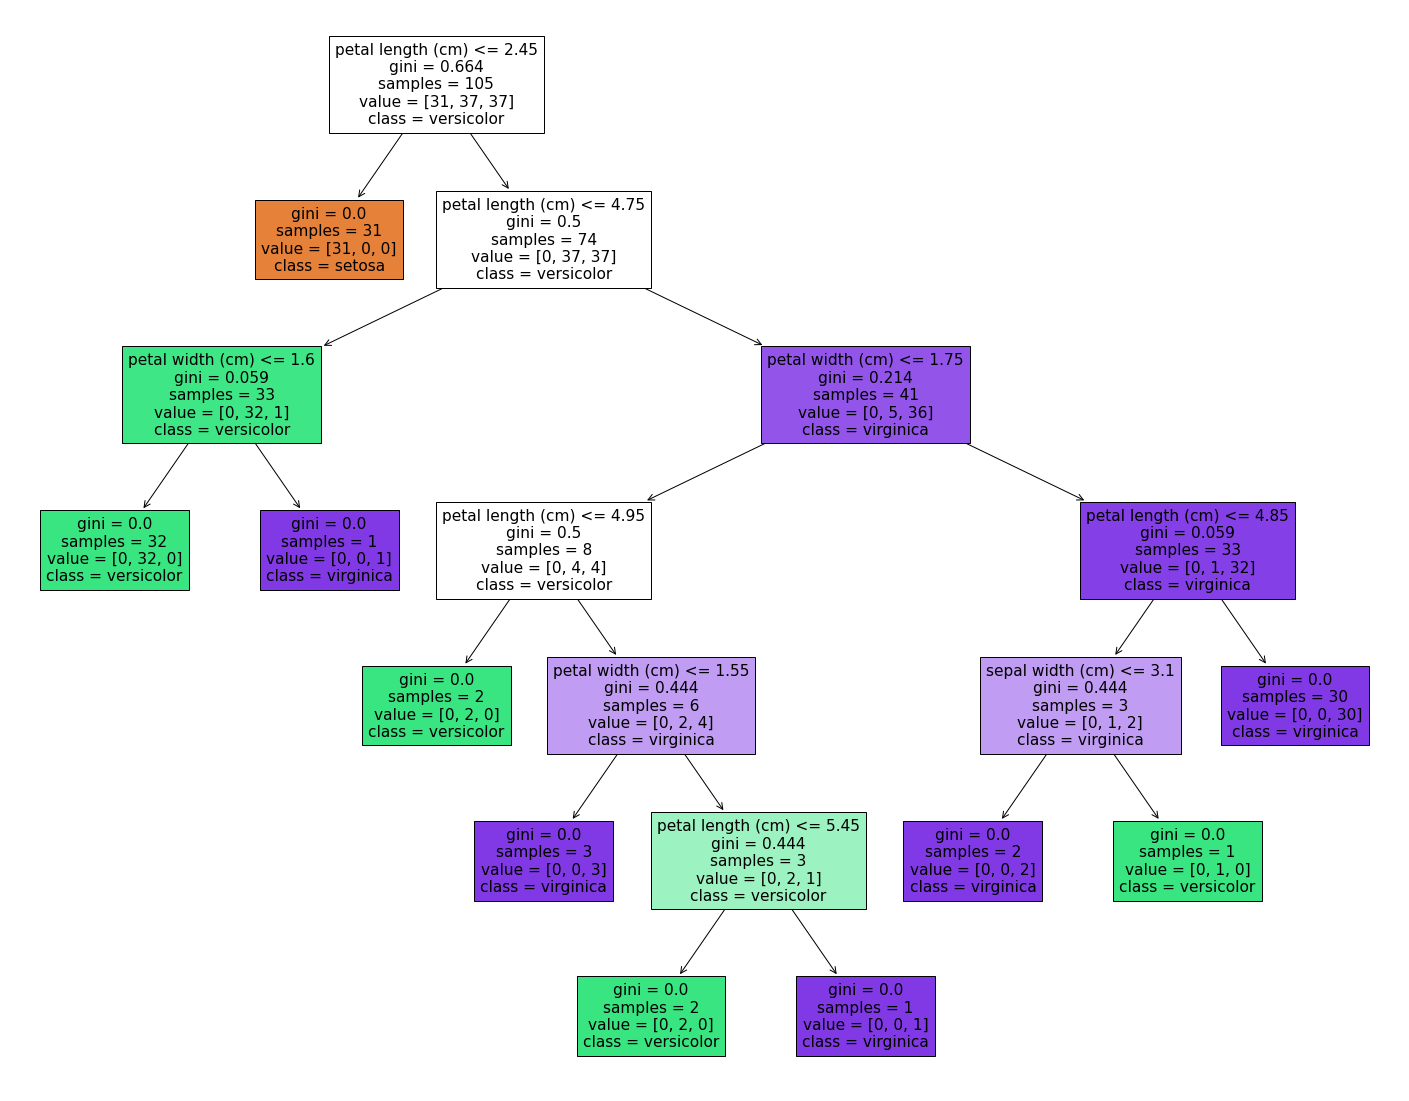

In [149]:
# plot the decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=irisFeatures,  
                   class_names=iris.target_names,
                   filled=True)

In [150]:

print("Random Forest Model\n")

RFTrain_Acc = []
RFTrain_Prec = []
RFTest_Acc = []
RFTest_Prec = []

for data, c in zip(data_sets, featureCombinations):
    x_train, x_test, y_train, y_test = data
    model = RandomForestClassifier(n_estimators = 100).fit(x_train, y_train)
    scores = modelScore(model, x_train, x_test, y_train, y_test)
    RFTrain_Acc.append(scores[0])
    RFTrain_Prec.append(scores[1])
    RFTest_Acc.append(scores[2])
    RFTest_Prec.append(scores[3])
    print(f"Combination {c}\n" + f"Training Accuracy Score: {scores[0]}\n" + f"Training Precision Score (testing): {scores[1]}\n" + f"Testing Accuracy Score: {scores[2]}\n" + f"Testing Precision Score: {scores[3]}\n")

Random Forest Model

Combination [0]
Training Accuracy Score: 0.7714285714285715
Training Precision Score (testing): 0.770479302832244
Testing Accuracy Score: 0.7555555555555555
Testing Precision Score: 0.7434640522875817

Combination [1]
Training Accuracy Score: 0.6190476190476191
Training Precision Score (testing): 0.6722222222222222
Testing Accuracy Score: 0.5333333333333333
Testing Precision Score: 0.5831784962219745

Combination [2]
Training Accuracy Score: 0.9428571428571428
Training Precision Score (testing): 0.9459459459459459
Testing Accuracy Score: 0.9555555555555556
Testing Precision Score: 0.9487179487179488

Combination [3]
Training Accuracy Score: 0.9428571428571428
Training Precision Score (testing): 0.9467643467643466
Testing Accuracy Score: 1.0
Testing Precision Score: 1.0

Combination [0, 1]
Training Accuracy Score: 0.9619047619047619
Training Precision Score (testing): 0.963963963963964
Testing Accuracy Score: 0.7777777777777778
Testing Precision Score: 0.74545454545

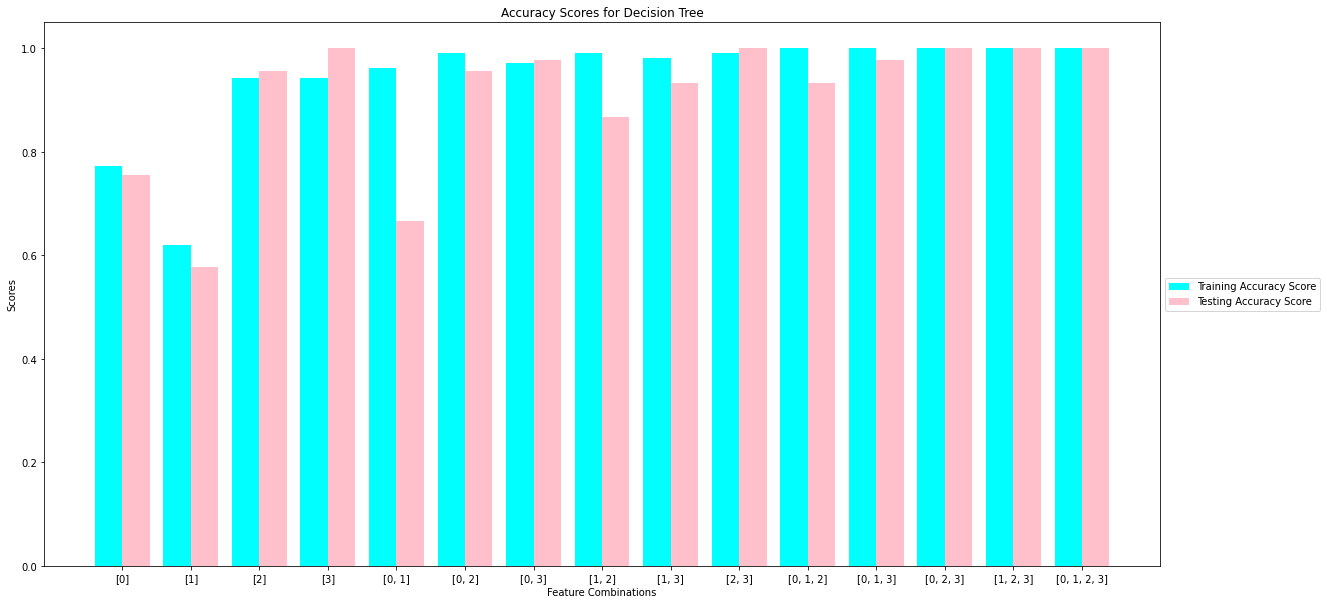

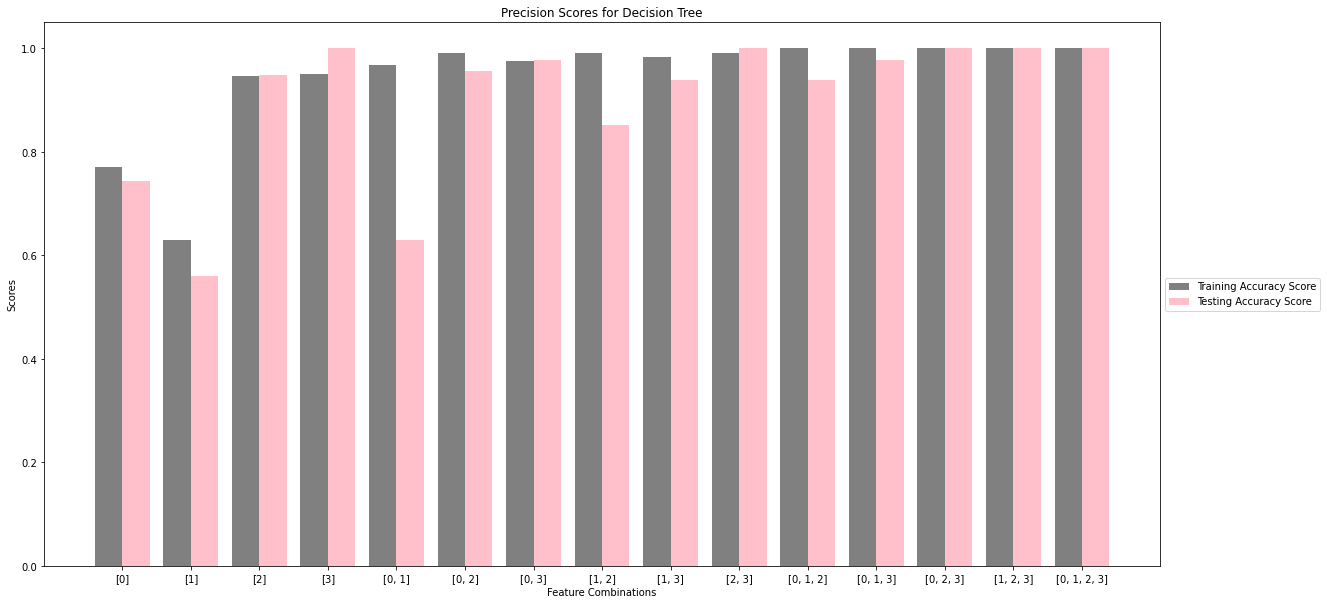

In [151]:
#graph for Decision tree accuracy
plt.rcParams["figure.figsize"] = (20,10)

X_axis = np.arange(len(featureCombinations))
  
plt.bar(X_axis - 0.2, DTrain_Acc, 0.4, label = 'Training Accuracy Score', color = ('cyan'))
plt.bar(X_axis + 0.2, DTest_Acc, 0.4, label = 'Testing Accuracy Score', color = ('pink'))

plt.xticks(X_axis, featureCombinations)
plt.xlabel('Feature Combinations')
plt.ylabel('Scores')
plt.title('Accuracy Scores for Decision Tree')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#decision tree precision
plt.bar(X_axis - 0.2, DTrain_Prec, 0.4, label = 'Training Accuracy Score', color = ('grey'))
plt.bar(X_axis + 0.2, DTest_Prec, 0.4, label = 'Testing Accuracy Score', color = ('pink'))

plt.xticks(X_axis, featureCombinations)
plt.xlabel('Feature Combinations')
plt.ylabel('Scores')
plt.title('Precision Scores for Decision Tree')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

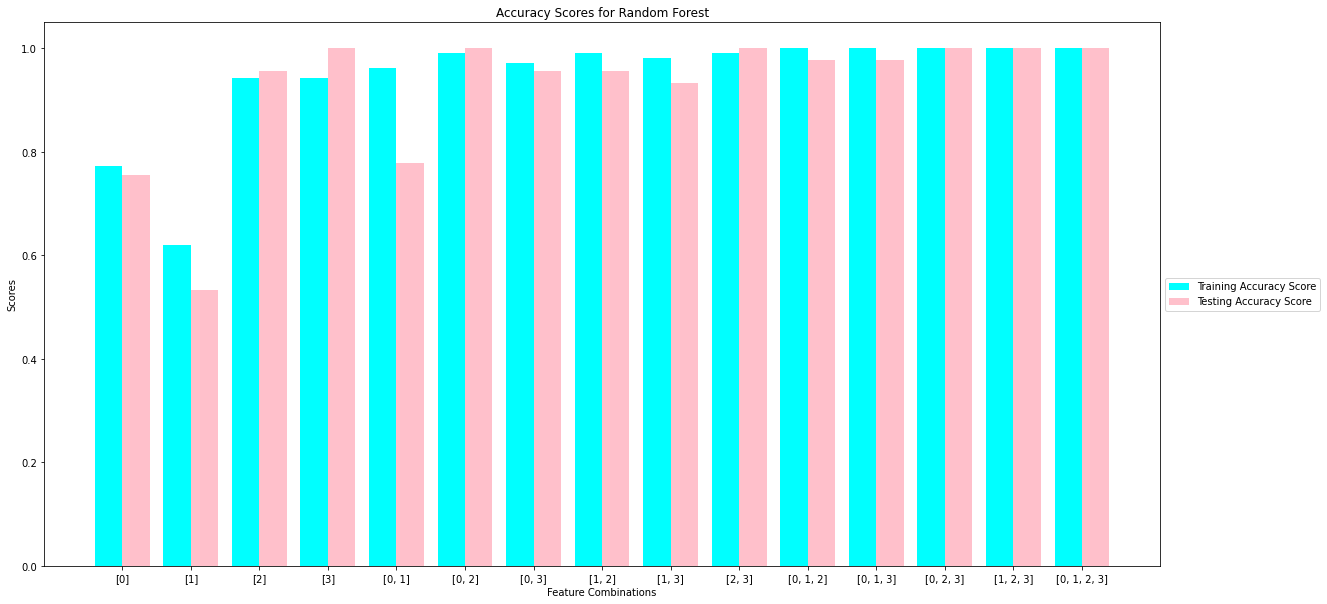

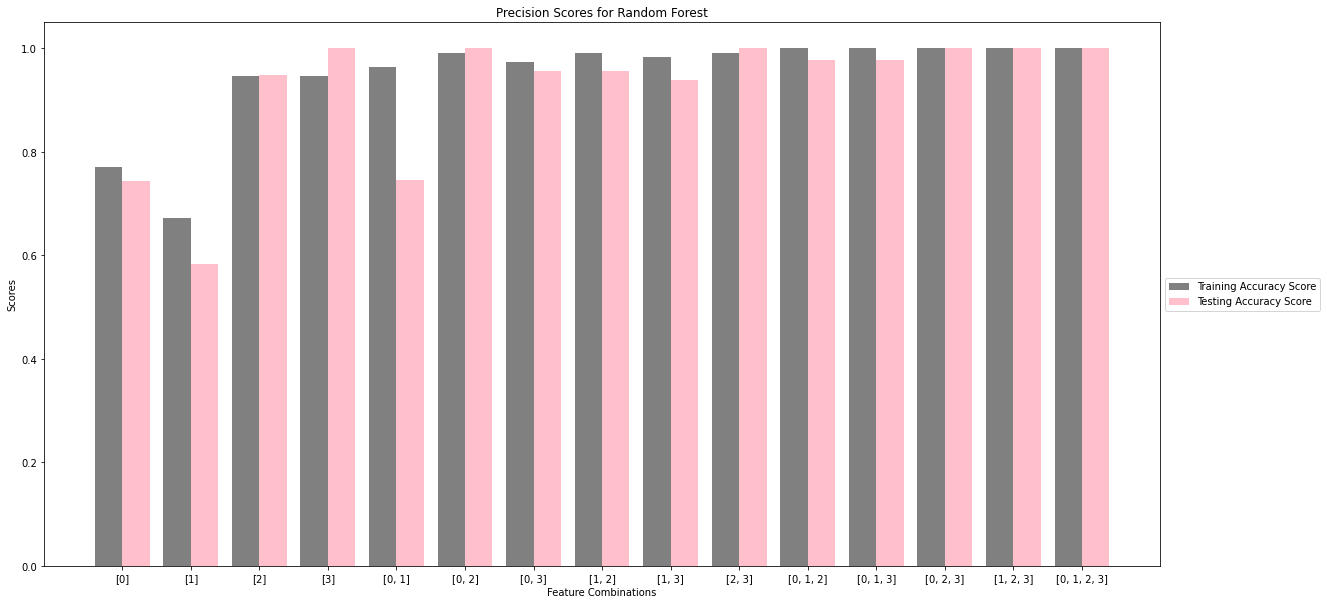

In [152]:
#Random forest
plt.bar(X_axis - 0.2, RFTrain_Acc, 0.4, label = 'Training Accuracy Score', color = ('cyan'))
plt.bar(X_axis + 0.2, RFTest_Acc, 0.4, label = 'Testing Accuracy Score', color = ('pink'))

plt.xticks(X_axis, featureCombinations)
plt.xlabel('Feature Combinations')
plt.ylabel('Scores')
plt.title('Accuracy Scores for Random Forest')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#precision
plt.bar(X_axis - 0.2, RFTrain_Prec, 0.4, label = 'Training Accuracy Score', color = ('grey'))
plt.bar(X_axis + 0.2, RFTest_Prec, 0.4, label = 'Testing Accuracy Score', color = ('pink'))

plt.xticks(X_axis, featureCombinations)
plt.xlabel('Feature Combinations')
plt.ylabel('Scores')
plt.title('Precision Scores for Random Forest')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Text(0, 0.5, 'Scores')

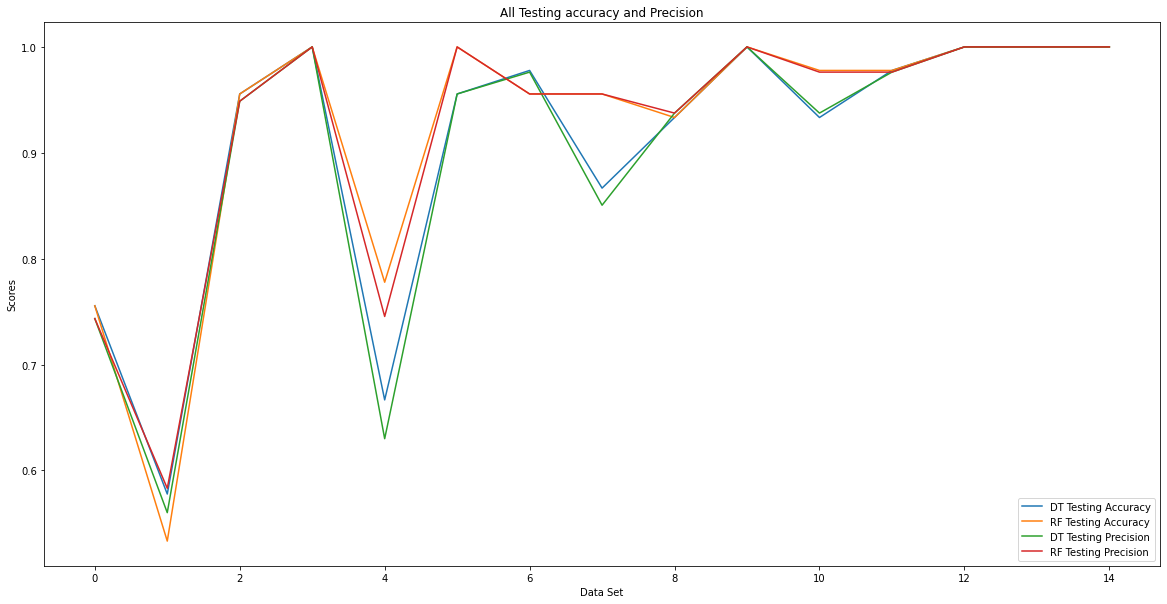

In [153]:
#All accuracy and precision
plt.plot(np.arange(15,step=1),DTest_Acc, label="DT Testing Accuracy")
plt.plot(np.arange(15,step=1),RFTest_Acc, label="RF Testing Accuracy")
plt.plot(np.arange(15,step=1),DTest_Prec, label="DT Testing Precision")
plt.plot(np.arange(15,step=1),RFTest_Prec, label="RF Testing Precision")

plt.title('All Testing accuracy and Precision')
plt.legend(loc="lower right")
plt.xlabel("Data Set")
plt.ylabel("Scores")


Text(0, 0.5, 'Scores')

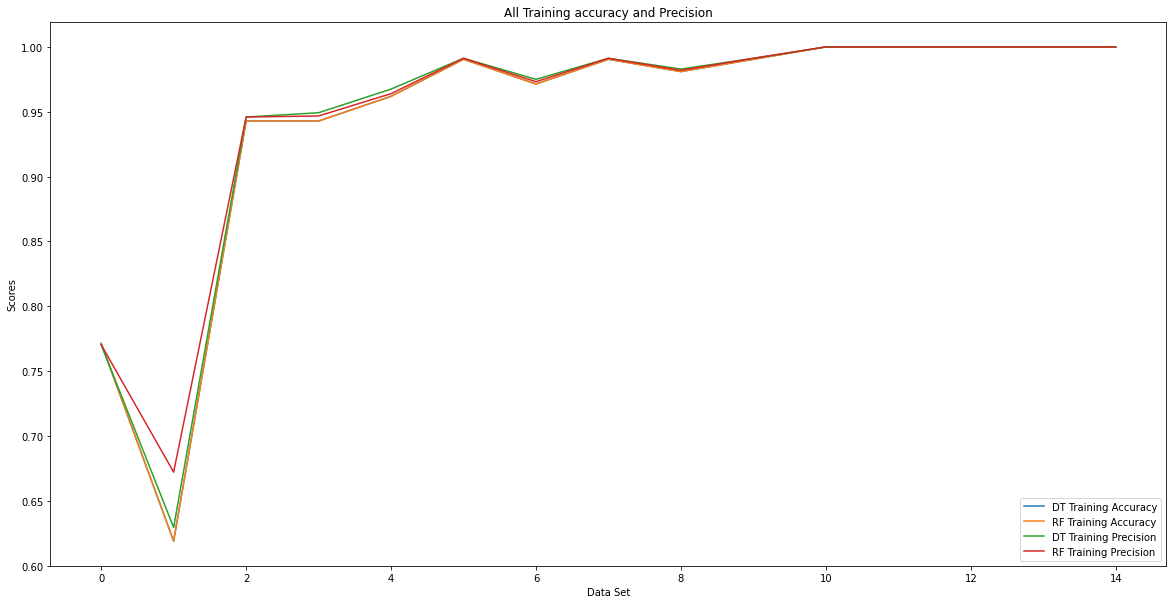

In [154]:
#training
plt.plot(np.arange(15,step=1),DTrain_Acc, label="DT Training Accuracy")
plt.plot(np.arange(15,step=1),RFTrain_Acc, label="RF Training Accuracy")
plt.plot(np.arange(15,step=1),DTrain_Prec, label="DT Training Precision")
plt.plot(np.arange(15,step=1),RFTrain_Prec, label="RF Training Precision")

plt.title('All Training accuracy and Precision')
plt.legend(loc="lower right")
plt.xlabel("Data Set")
plt.ylabel("Scores")

In [155]:
t = pd.DataFrame(columns = ['Features Combo', 'DT Accuracy', 'DT Precision', 'RF Accuracy', 'RF Precision'])
t = pd.DataFrame({'Features':featureCombinations, 'DT Accuracy':DTest_Acc, 'RF Accuracy': RFTest_Acc, 'DT Precision': DTest_Prec, 'RF Precision': RFTest_Prec})
t.head(15)

,Features,DT Accuracy,RF Accuracy,DT Precision,RF Precision
0,[0],0.755556,0.755556,0.743464,0.743464
1,[1],0.577778,0.533333,0.560185,0.583178
2,[2],0.955556,0.955556,0.948718,0.948718
3,[3],1.000000,1.000000,1.000000,1.000000
4,"[0, 1]",0.666667,0.777778,0.630037,0.745455
5,"[0, 2]",0.955556,1.000000,0.955556,1.000000
6,"[0, 3]",0.977778,0.955556,0.976190,0.955556
7,"[1, 2]",0.866667,0.955556,0.850505,0.955556
8,"[1, 3]",0.933333,0.933333,0.937500,0.937500
9,"[2, 3]",1.000000,1.000000,1.000000,1.000000


Here we looked at decision tree and random forest tree classifiers which tested with the 15 possible combination of the features to find their accuracy. Between the Decision Tree and Random Forest, the scores were fairly similar and did not make much difference which classifer model we used. Though there were some Feature Combinations at which the Accuracy and Precision for Random Forest was better than that of Decision Tree as Random Forest is more complex and uses many decision trees which prevents overfitting leading to better accuracy and precision. 
